In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
#让所有的变量或者声明都能显示出来
InteractiveShell.ast_node_interactivity = 'all'

# PCA

## 线性PCA

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        ...,
        [ 9.854922,  9.201393],
        [ 9.11458 ,  9.134215],
        [10.334899,  8.543604]])

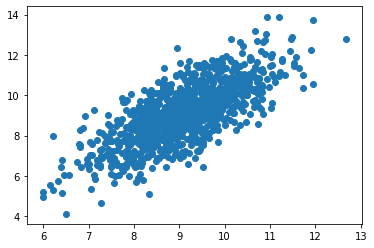

In [2]:
def loadDataSet(filename, delim='\t'):
    fr = open(filename)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return np.mat(datArr)
dataMat = loadDataSet('testSet.txt')
dataMat
plt.scatter(dataMat.A[:,0],dataMat.A[:,1])

In [20]:
np.dot(redEigVects[:,0:1],np.mat(redEigVects[:,0:1]).I)

matrix([[0.27087023, 0.44440922],
        [0.44440922, 0.72912977]])

协方差矩阵形状： (2, 2)
特征值： [0.36651371 2.89713496]
特征向量： [[-0.85389096 -0.52045195]
 [ 0.52045195 -0.85389096]] 
一列为一个单位化的特征向量


array([[-0.52045195, -0.85389096],
       [-0.85389096,  0.52045195]])

[[10.37044569 11.23955536]
 [10.55719313 11.54594665]
 [ 9.01323877  9.01282393]
 ...
 [ 9.32502753  9.52436704]
 [ 9.0946364   9.14637075]
 [ 9.16271152  9.2580597 ]]


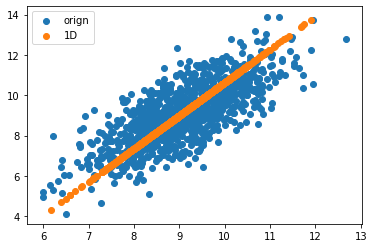

In [21]:
n_pca = 1 #保留的主成分维度
# 求矩阵每一列的均值
meanVals = np.mean(dataMat, axis=0)
# 数据矩阵每一列特征减去该列特征均值
meanRemoved = dataMat - meanVals
# 计算协方差矩阵，处以n-1是为了得到协方差的无偏估计
# cov(x, 0) = cov(x)除数是n-1(n为样本个数)
# cov(x, 1)除数是n
covMat = np.cov(meanRemoved, rowvar=0)#rowvar=0:行为样本数，列为特征数，计算特征间的协方差
print('协方差矩阵形状：',covMat.shape)

# 计算协方差矩阵的特征值及对应的特征向量
# 均保存在相应的矩阵中
eigVals, eigVects = np.linalg.eig(covMat)
print('特征值：',eigVals)
print('特征向量：',eigVects,'\n一列为一个单位化的特征向量')
# sort():对特征值矩阵排序(由小到大)
# argsort():对特征矩阵进行由小到大排序，返回对应排序后的索引
eigValInd = np.argsort(eigVals)
eigValInd = eigValInd[:: -1] #特征值由大到小的索引
# 将特征值最大的N个特征值对应索引的特征向量提取出来，组成压缩矩阵
redEigVects = eigVects[:, eigValInd]
redEigVects
# 将去除均值后的矩阵*压缩矩阵，转换到新的空间，使维度降低为N
lowDDataMat = meanRemoved * redEigVects[:,0:n_pca] #redEigVects为可逆矩阵，redEigVects[:,0:n_pca]不是

# 利用降维后的矩阵反构出原数据矩阵(用作测试，可跟未压缩的原矩阵比对)
# 此处用转置和逆的结果一样redEigVects.I
reconMat = (lowDDataMat * redEigVects[:,0:n_pca].T) + meanVals 
print(reconMat)
_ = plt.scatter(dataMat.A[:,0],dataMat.A[:,n_pca],label='orign')
_ = plt.scatter(reconMat.A[:,0],reconMat.A[:,n_pca],label='1D')
_ = plt.legend()

## 针对大矩阵——在线PCA分析《Incremental Eigenanalysis for Classification》

## 其他降维技术——独立成分分析、因子分析等

# SVD


In [1]:
import numpy as np

A = np.array([[2,2],[1,2]])
lamda,U=np.linalg.eig(A)
print('方阵 A: ',A)
print('特征值 lamda: ',lamda)
print('特征向量 U: ',U)

方阵 A:  [[2 2]
 [1 2]]
特征值 lamda:  [3.41421356 0.58578644]
特征向量 U:  [[ 0.81649658 -0.81649658]
 [ 0.57735027  0.57735027]]


In [2]:
np.dot(U[:,0],U[:,0])

1.0000000000000002

# 马氏距离

## 载入原始数据

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        ...,
        [ 9.854922,  9.201393],
        [ 9.11458 ,  9.134215],
        [10.334899,  8.543604]])

Text(0.5, 1.0, '与均值点的欧式距离：\ndata1:4.242640687119285，data2:4.242640687119285')

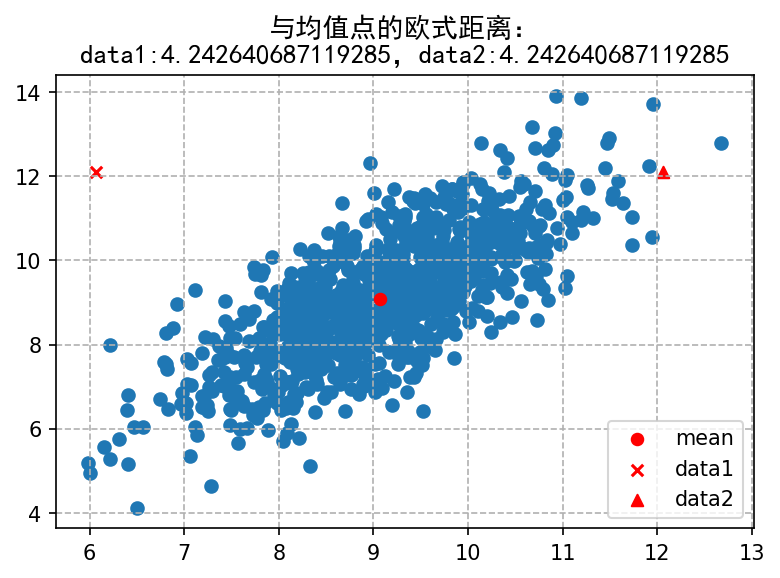

In [27]:
def loadDataSet(filename, delim='\t'):
    fr = open(filename)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return np.mat(datArr)
dataMat = loadDataSet('testSet.txt')
dataMat
datamean = np.array([dataMat.A[:,0].mean(),dataMat.A[:,1].mean()])
data1 = np.array([dataMat.A[:,0].mean()-3,dataMat.A[:,1].mean()+3])
data2 = np.array([dataMat.A[:,0].mean()+3,dataMat.A[:,1].mean()+3])

fig = plt.figure(dpi=150)
plt.scatter(dataMat.A[:,0],dataMat.A[:,1])
plt.scatter(datamean[0],datamean[1],s=30,c='r',label='mean')
plt.scatter(data1[0],data1[1],s=30,c='r',marker='x',label='data1')
plt.scatter(data2[0],data2[1],s=30,c='r',marker='^',label='data2')
plt.grid(linestyle ='--')
plt.legend()
plt.title('与均值点的欧式距离：\n'+'data1:{}，data2:{}'.format(np.sqrt(np.sum(np.square(data1-datamean))),
                                                               np.sqrt(np.sum(np.square(data2-datamean)))),fontproperties='SimHei',fontsize=13)

## 将数据集投影到各个主成分上

(-6.002396478658287, 6.131959127040958, -2.092612662503803, 4.444473882234391)

Text(0.5, 1.0, '与均值点的欧式距离：\ndata1:4.242640687119285，data2:4.242640687119286')

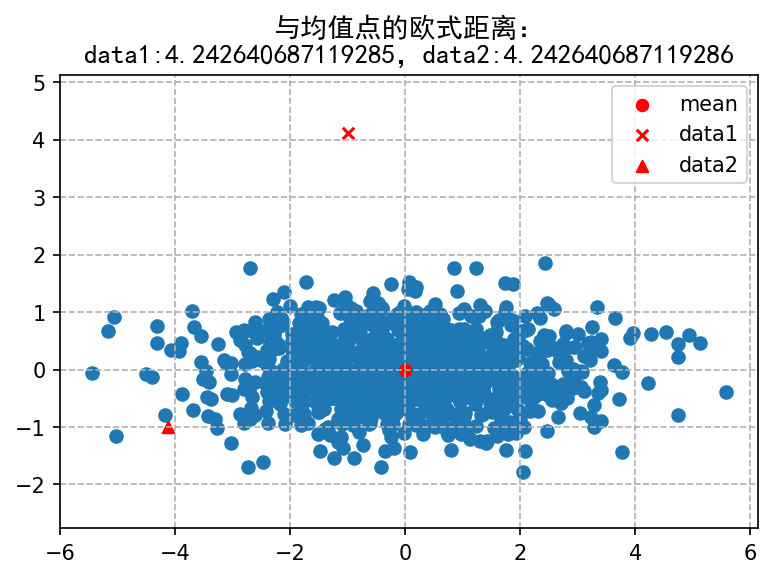

In [37]:
# 求矩阵每一列的均值
meanVals = np.mean(dataMat, axis=0)
# 数据矩阵每一列特征减去该列特征均值
meanRemoved = dataMat - meanVals
# 计算协方差矩阵，处以n-1是为了得到协方差的无偏估计
covMat = np.cov(meanRemoved, rowvar=0)#rowvar=0:行为样本数，列为特征数，计算特征间的协方差

# 计算协方差矩阵的特征值及对应的特征向量
eigVals, eigVects = np.linalg.eig(covMat)
# argsort():对特征矩阵进行由小到大排序，返回对应排序后的索引
eigValInd = np.argsort(eigVals)
eigValInd = eigValInd[:: -1] #特征值由大到小的索引
# 将特征值最大的N个特征值对应索引的特征向量提取出来，组成压缩矩阵
redEigVects = eigVects[:, eigValInd]
# 将去除均值后的矩阵*压缩矩阵，转换到新的空间，使维度降低为N
lowDDataMat = meanRemoved * redEigVects[:,:] #redEigVects为可逆矩阵，redEigVects[:,0:n_pca]不是

datamean_new = (datamean[None,:]-meanVals)* redEigVects[:,:]
data1_new = (data1[None,:]-meanVals)* redEigVects[:,:]
data2_new = (data2[None,:]-meanVals)* redEigVects[:,:]

fig = plt.figure(dpi=150)
plt.scatter(lowDDataMat.A[:,0],lowDDataMat.A[:,1])

plt.scatter(datamean_new[0,0],datamean_new[0,1],s=30,c='r',label='mean')

plt.scatter(data1_new[0,0],data1_new[0,1],s=30,c='r',marker='x',label='data1')
plt.scatter(data2_new[0,0],data2_new[0,1],s=30,c='r',marker='^',label='data2')
plt.grid(linestyle ='--')
plt.legend()
plt.axis('equal')
plt.title('与均值点的欧式距离：\n'+'data1:{}，data2:{}'.format(np.sqrt(np.sum(np.square(data1_new-datamean_new))),
                                                               np.sqrt(np.sum(np.square(data2_new-datamean_new)))),fontproperties='SimHei',fontsize=13)

## 将每个主成分的维度除以标准差

(-3.5284225531826348,
 3.6045419702407084,
 -3.452021927987844,
 7.341062353629062)

Text(0.5, 1.0, '与均值点的欧式距离：\ndata1:6.835688898973007，data2:2.9321985408927658')

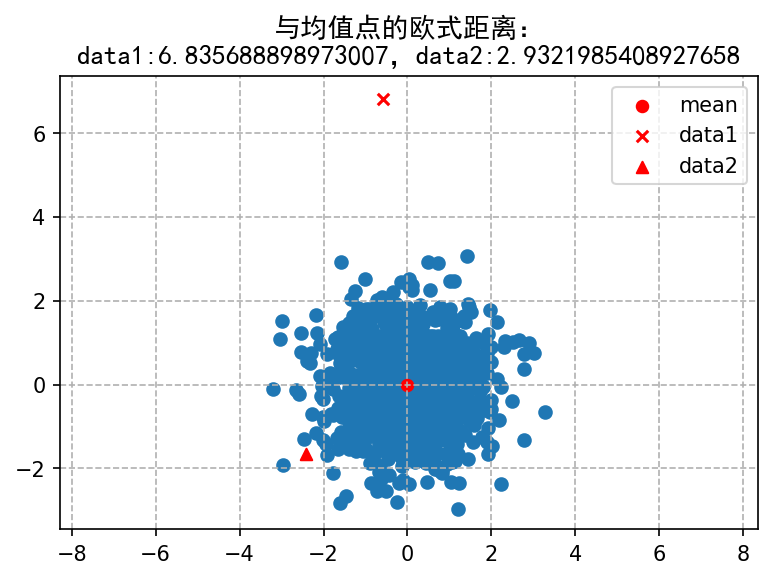

In [46]:
reg_eigVals = eigVals[eigValInd] #特征值由大到小排序
lowDDataMat_sca = lowDDataMat/np.sqrt(reg_eigVals)
datamean_new_sca = datamean_new/np.sqrt(reg_eigVals)
data1_new_sca = data1_new/np.sqrt(reg_eigVals)
data2_new_sca = data2_new/np.sqrt(reg_eigVals)

fig = plt.figure(dpi=150)
plt.scatter(lowDDataMat_sca.A[:,0],lowDDataMat_sca.A[:,1])
plt.scatter(datamean_new_sca[0,0],datamean_new_sca[0,1],s=30,c='r',label='mean')
plt.scatter(data1_new_sca[0,0],data1_new_sca[0,1],s=30,c='r',marker='x',label='data1')
plt.scatter(data2_new_sca[0,0],data2_new_sca[0,1],s=30,c='r',marker='^',label='data2')
plt.grid(linestyle ='--')
plt.legend()
plt.axis('equal')
plt.title('与均值点的欧式距离：\n'+'data1:{}，data2:{}'.format(np.sqrt(np.sum(np.square(data1_new_sca-datamean_new_sca))),
                                                               np.sqrt(np.sum(np.square(data2_new_sca-datamean_new_sca)))),fontproperties='SimHei',fontsize=13)

## 验证马氏距离计算的准确性

In [50]:
from scipy.spatial import distance

distance.mahalanobis(data1[None,:],datamean[None,:] , np.mat(covMat).I)
distance.mahalanobis(data2[None,:],datamean[None,:] , np.mat(covMat).I)

matrix([[6.8356889]])

matrix([[2.93219854]])